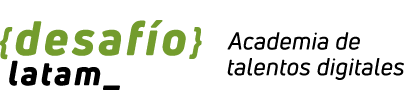

<center><h1> <font color='green'>Cluestering con KMeans</font></h1></center>

Veremos de manera práctica el uso de clustering con KMeans, utilizando el Dataset **Iris**. El conjunto de datos Iris contiene mediciones de longitud y ancho de los sépalos y pétalos de tres especies diferentes de flores de iris: setosa, versicolor y virginica. Cada muestra en el conjunto de datos representa una flor y tiene cuatro características (variables):

1.   Longitud del sépalo (en centímetros)
2.   Ancho del sépalo (en centímetros)
3.   Longitud del pétalo (en centímetros)
4.   Ancho del pétalo (en centímetros).

El conjunto de datos consta de 150 muestras, con 50 muestras para cada especie de iris. Es decir, hay 50 flores de la especie "Iris setosa", 50 flores de la especie "Iris versicolor" y 50 flores de la especie "Iris virginica".

## Importación de bibliotecas y lectura de datos

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances

import warnings
warnings.filterwarnings('ignore')

# Cargar el conjunto de datos Iris
iris = load_iris()
X = pd.DataFrame(iris.data)
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Visualización de las variables

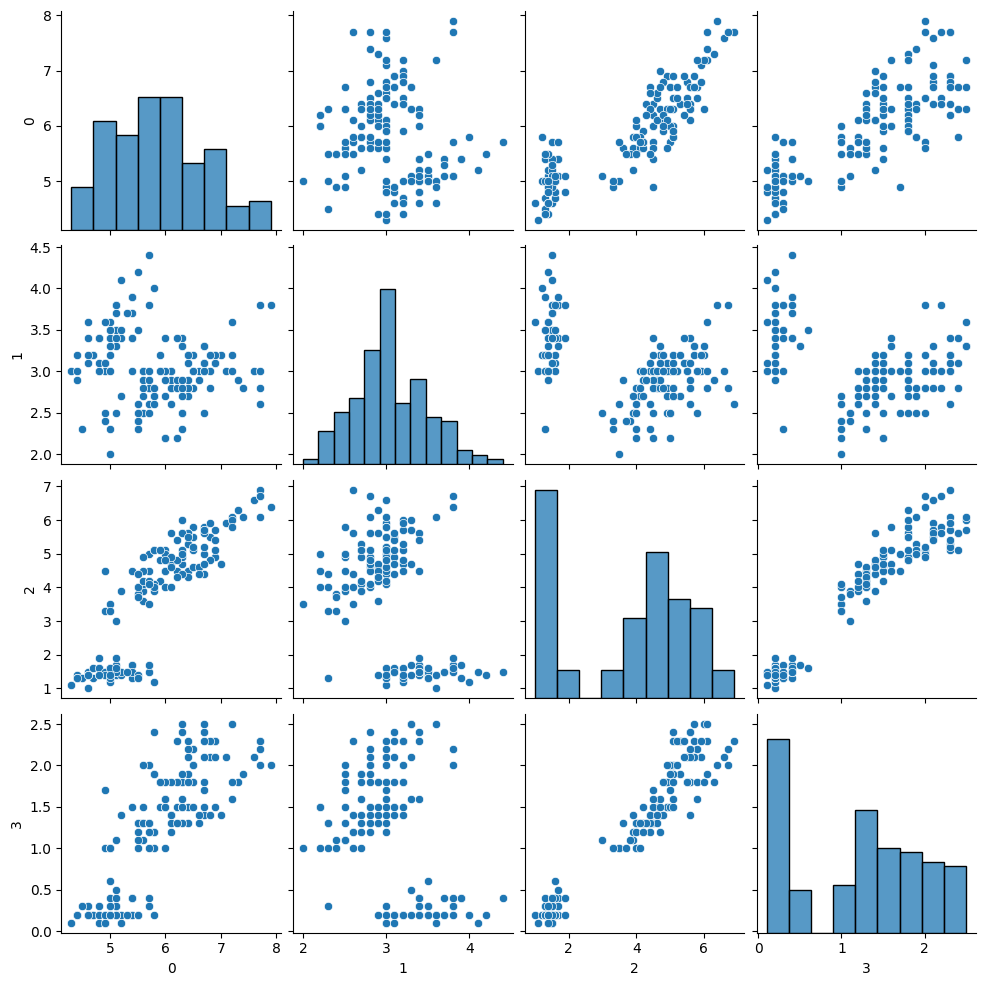

In [31]:
sns.pairplot(X)

## Método del Codo

Vamos a aplicar el método del codo para calcular la cantidad óptima de clusters. Para ello, tomaremos una serie de valores entre 1 y 8, que iremos comparando. Creamos además una lista para calcular la inercia e ir guardando los valores

In [32]:
# Definir una lista de posibles valores de k para el método del codo
k_values = range(2, 8)
# Inicializar listas para almacenar las métricas
inertia_values = []

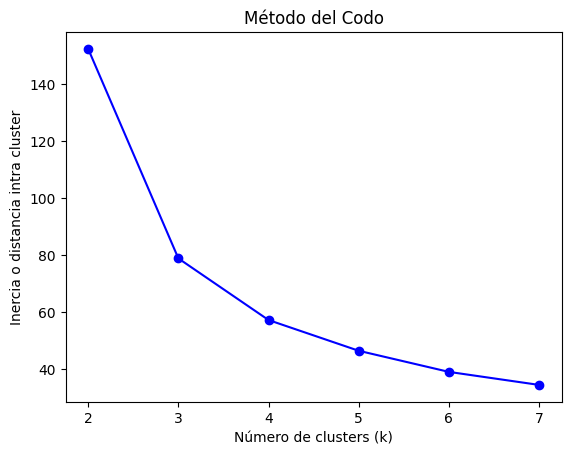

In [33]:
# Realizar clustering con diferentes valores de k y calcular las métricas
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42) #random_state es una semilla para valores aleatorios
    kmeans.fit(X)
    labels = kmeans.labels_
    # Calcular la inercia
    inertia_values.append(kmeans.inertia_)

# Graficar el método del codo utilizando la inercia
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia o distancia intra cluster')
plt.title('Método del Codo')
plt.show()

Podemos observar que la inercia comienza a descender más lentamente a partir del valor k = 3, por lo que será el valor que usaremos

## Clustering

Veremos ahora la aplicación del algoritmo

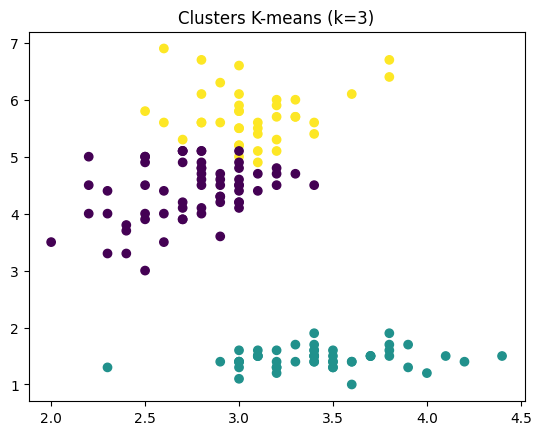

In [34]:
# Realizar clustering con el valor óptimo de k (elegido por el método del codo)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X) #aplicamos kmeans al conjunto de datos
labels = kmeans.labels_ #etiquetamos los resutados, para asociar a cada punto una etiqueta de cluster
X['clusters'] = labels #insertamos en la data una columna con las etiquetas de cluster

# Graficamos los clusters en el espacio reducido por PCA
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels) # utilizamos la segunda y la tercera columna
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')
plt.title('Clusters K-means (k=3)')
plt.show()

Realizaremos nuevamente los gráficos, utilizando las etiquetas generadas. (Para esto, usamos **hue = 'clusters'**)

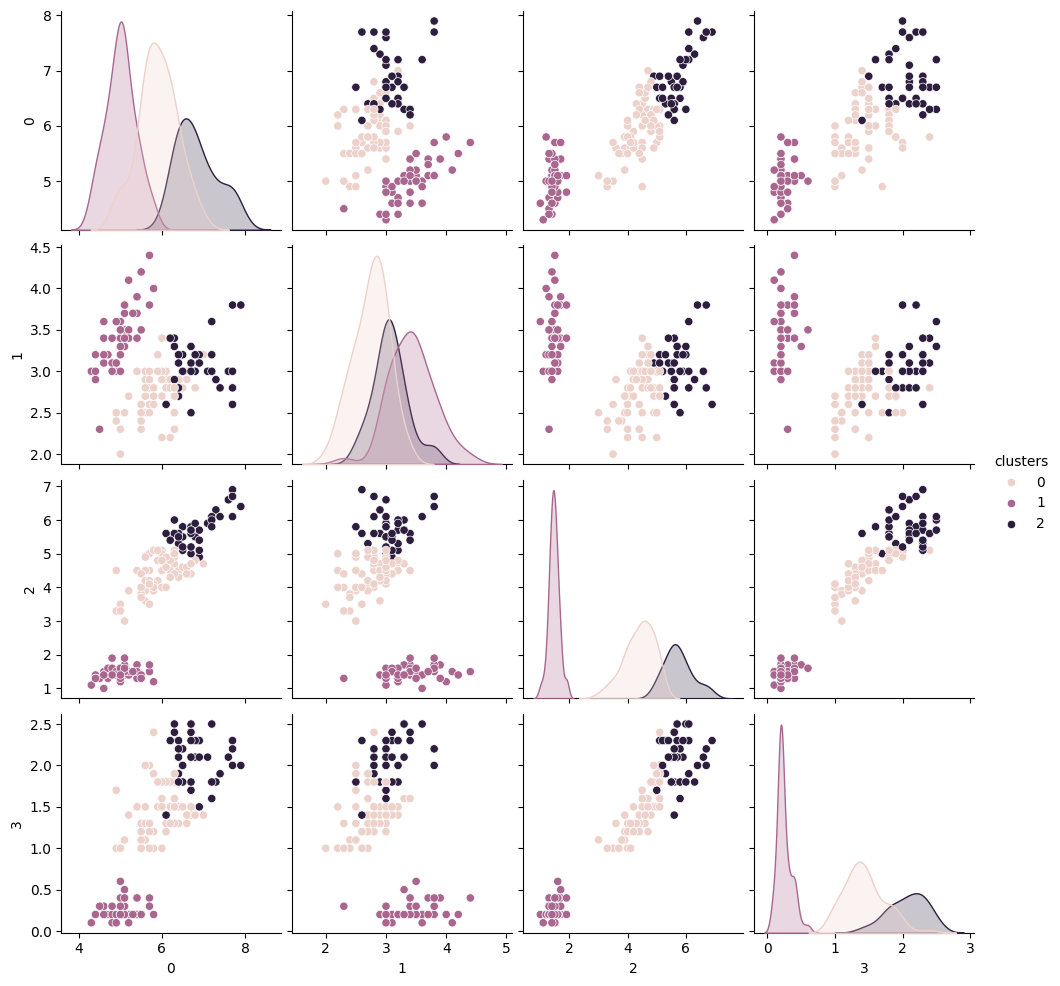

In [7]:
sns.pairplot(X, hue='clusters')

In [8]:
kmeans.cluster_centers_# centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Validación númerica

Vamos a aplicar ahora las métricas para evaluar el método.

In [9]:
# Calcular la puntuación de silhouette
silhouette_scores = silhouette_score(X, labels)
# Calcular el índice de Dunn
dunn_index = davies_bouldin_score(X, labels)
print(f'Silhoutter Score : {silhouette_scores}')
print(f'Davies Bouldin Score : {dunn_index}')

Silhoutter Score : 0.6851559988597147
Davies Bouldin Score : 0.4775787552906774


<center><strong>Regresemos ahora a nuestra presentación</strong></center>